In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

from sklearn.metrics import mean_squared_error 
from math import sqrt


In [2]:
#pip install -U scikit-learn

In [3]:
# pip install yellowbrick

In [4]:
# !pip install --upgrade scikit-learn==0.20.3

In [5]:
df1 = pd.read_excel('/Users/ruchimendhegiri/Desktop/STEVENS/Sem2/637/Final Project_637/online_retail_II.xlsx',sheet_name="Year 2010-2011")


In [6]:
df1.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object        
 2   Description  540456 non-null  object        
 3   Quantity     541910 non-null  int64         
 4   InvoiceDate  541910 non-null  datetime64[ns]
 5   Price        541910 non-null  float64       
 6   Customer ID  406830 non-null  float64       
 7   Country      541910 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [8]:
df2 = pd.read_excel('/Users/ruchimendhegiri/Desktop/STEVENS/Sem2/637/Final Project_637/online_retail_II.xlsx',sheet_name="Year 2009-2010")


In [9]:
df2.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


In [11]:
df= pd.concat([df2,df1],axis=0)

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 791007 entries, 0 to 541909
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      791007 non-null  object        
 1   StockCode    791007 non-null  object        
 2   Description  791007 non-null  object        
 3   Quantity     791007 non-null  int64         
 4   InvoiceDate  791007 non-null  datetime64[ns]
 5   Price        791007 non-null  float64       
 6   Customer ID  791007 non-null  int64         
 7   Country      791007 non-null  object        
 8   TotalPrice   791007 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(4)
memory usage: 60.3+ MB


In [256]:
df["StockCode"].nunique()

4629

In [257]:
df["Customer ID"].nunique()

5874

In [258]:
df["Country"].nunique()

41

In [259]:
df["Price"].max()

10953.5

In [260]:
# Data Preprocessing

df.isnull().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
TotalPrice     0
dtype: int64

In [261]:
#  extract the returned transactions from the data.
returned = df[df["Invoice"].str.contains("C",na=False)].index
df = df.drop(returned, axis = 0)

AttributeError: Can only use .str accessor with string values!

In [ ]:
# Missing observations were deleted.
df.dropna(inplace = True)

In [ ]:
df["Customer ID"] = df["Customer ID"].astype(int)


In [ ]:
#outlier
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = (Q1 - 1.5 * IQR)
upper_bound = (Q3 + 1.5 * IQR)

without_outlier = df[(df['Price'] > lower_bound ) & (df['Price'] < upper_bound)]

In [ ]:
plt.boxplot(without_outlier['Price'],  notch=True,  # notch shape
                         patch_artist=True,
                   boxprops=dict(facecolor="sandybrown", color="black"),)
plt.ylabel('Price')
plt.title("Box plot for price ", fontdict=None, position= [0.48,1.05], size = 'xx-large')

plt.show()

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
#RFM Metric :

# Recency Metric: 
df["InvoiceDate"].max()

In [ ]:
end_date = dt.datetime(2011,12,9)
df.groupby("Customer ID").agg({"InvoiceDate":"max"}).head()
df_ = (end_date - df.groupby("Customer ID").agg({"InvoiceDate":"max"}))
df_.rename(columns={"InvoiceDate": "Recency"}, inplace = True)
recency_df = df_["Recency"].apply(lambda x: x.days)
recency_df.head()


In [ ]:
# Frequency Metric :
temp_df = df.groupby(["Customer ID","Invoice"]).agg({"Invoice":"count"})
frequency_df = temp_df.groupby("Customer ID").agg({"Invoice":"count"})
frequency_df.rename(columns={"Invoice": "Frequency"}, inplace = True)
frequency_df.head()

In [ ]:
# Monetary Metric:
#How much money has been earned per invoice? 
df["TotalPrice"] = df["Quantity"]*df["Price"]

monetary_df = df.groupby("Customer ID").agg({"TotalPrice":"sum"})
monetary_df.rename(columns = {"TotalPrice": "Monetary"}, inplace = True)
monetary_df.head()

In [ ]:
# Final RFM Metric :

rfm = pd.concat([recency_df, frequency_df, monetary_df],  axis=1)
rfm.head()

In [ ]:
rfm.describe()

In [ ]:
# RFM Score Metric:
rfm_score = rfm.copy()
rfm_score

In [ ]:
#Recency distribution plot
import seaborn as sns
x = rfm['Recency']

ax = sns.distplot(x)

In [ ]:
#Monetary distribution plot
import seaborn as sns
x = rfm['Monetary']

ax = sns.distplot(x)

In [ ]:
#Frequency distribution plot
import seaborn as sns
x = rfm['Frequency']

ax = sns.distplot(x)

In [ ]:
#Divide Each Recency, Frequency and Monetary values on the scale of 1 to 5 with 5 being highest.

#rfm_score["RecencyScore"] = pd.qcut(rfm_score['Recency'], 10, labels = [10,9,8,7,6,5,4,3,2,1])
#rfm_score["FrequencyScore"] = pd.qcut(rfm_score['Frequency'].rank(method = "first"), 10, labels = [1,2,3,4,5,6,7,8,9,10])
#rfm_score["MonetaryScore"] = pd.qcut(rfm_score['Monetary'], 10, labels = [1,2,3,4,5,6,7,8,9,10])

#rfm_score["RFM_SCORE"] = rfm_score['RecencyScore'].astype(str) + rfm_score['FrequencyScore'].astype(str) + rfm_score['MonetaryScore'].astype(str)
#rfm_score.head()

In [ ]:
#rfm_1= rfm_score.drop(["Recency","Frequency","Monetary","RFM_SCORE"],axis=1)
#rfm_1

In [262]:
rfm

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,324,12,77556.46,6
12347,1,8,5458.52,5
12348,74,5,1979.40,1
12349,17,4,4380.81,5
12350,309,1,291.80,3
...,...,...,...,...
18283,2,22,2687.34,5
18284,430,1,461.68,6
18285,659,1,427.00,4


In [263]:
# K-means Clustring:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#sc = MinMaxScaler((0,1))
sc = MinMaxScaler()

#sc = StandardScaler()
#Transform data
df3 = sc.fit_transform(rfm)

kmeans = KMeans(n_clusters = 20)
k_fit = kmeans.fit(df3)
k_fit.labels_

array([18,  6,  3, ..., 19, 13, 16], dtype=int32)

Text(0.5, 1.0, 'Elbow method for Optimum number of clusters')

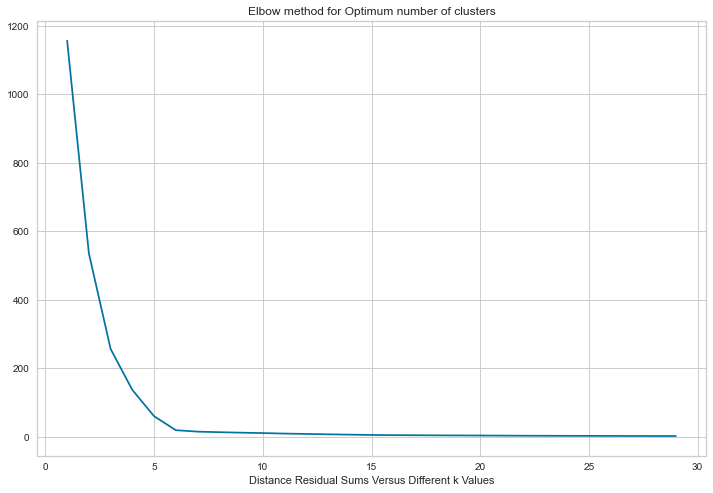

In [264]:
# Determining Optimum number of Clusters

kmeans = KMeans(n_clusters = 20)
k_fit = kmeans.fit(df3)
ssd = []

K = range(1,30)

for k in K:
    kmeans = KMeans(n_clusters = k).fit(df3)
    ssd.append(kmeans.inertia_)

plt.plot(K, ssd, "bx-")
plt.xlabel("Distance Residual Sums Versus Different k Values")
plt.title("Elbow method for Optimum number of clusters")

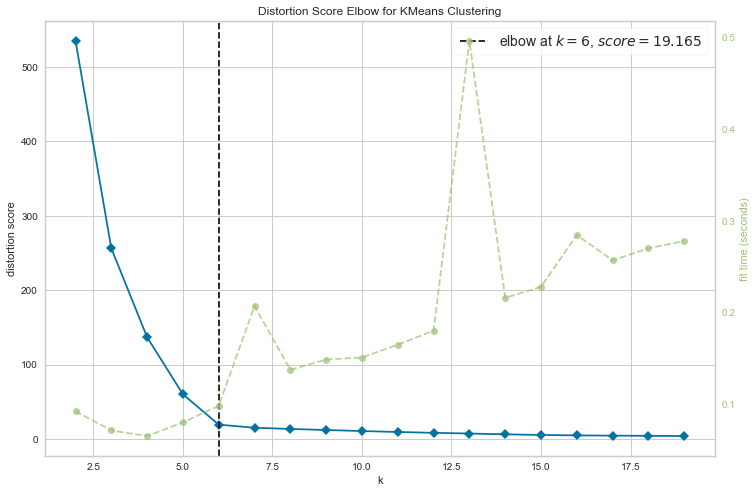

In [265]:
from sklearn.datasets import make_blobs
from yellowbrick.cluster import KElbowVisualizer

kmeans = KMeans()
visu = KElbowVisualizer(kmeans, k = (2,20))
visu.fit(df3)
visu.poof();

In [266]:
kmeans = KMeans(n_clusters = 6).fit(df3)
kmeans.labels_

array([2, 0, 3, ..., 5, 4, 0], dtype=int32)

In [267]:
kmeans.cluster_centers_

array([[3.38208605e-02, 2.34499110e-02, 8.66357918e-03, 8.00000000e-01],
       [3.32398238e-01, 5.96350883e-03, 2.12066327e-03, 4.00000000e-01],
       [5.39898135e-01, 4.40985509e-03, 1.73137092e-03, 1.00000000e+00],
       [1.49857731e-01, 9.72263350e-03, 3.07391799e-03, 2.22044605e-16],
       [7.11572663e-01, 2.90854978e-03, 1.17709882e-03, 2.00000000e-01],
       [8.98691997e-01, 9.08317873e-04, 9.53976508e-04, 6.00000000e-01]])

In [268]:
kumeler = kmeans.labels_
pd.DataFrame({"Customer ID": rfm.index, "Kumeler": kumeler})
rfm["cluster_no"] = kumeler
rfm["cluster_no"] = rfm["cluster_no"] + 1

In [269]:
# Number of clients in Each Cluster :

rfm.groupby("cluster_no").agg({"cluster_no":"count"})

,cluster_no
cluster_no,
1,2537
2,697
3,879
4,921
5,448
6,392


In [270]:
rfm.head()

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,324,12,77556.46,3
12347,1,8,5458.52,1
12348,74,5,1979.40,4
12349,17,4,4380.81,1
12350,309,1,291.80,2


In [271]:
#rfm[['cluster_no']]= rfm_1[['cluster_no']]

In [272]:
rfm

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,324,12,77556.46,3
12347,1,8,5458.52,1
12348,74,5,1979.40,4
12349,17,4,4380.81,1
12350,309,1,291.80,2
...,...,...,...,...
18283,2,22,2687.34,1
18284,430,1,461.68,3
18285,659,1,427.00,6


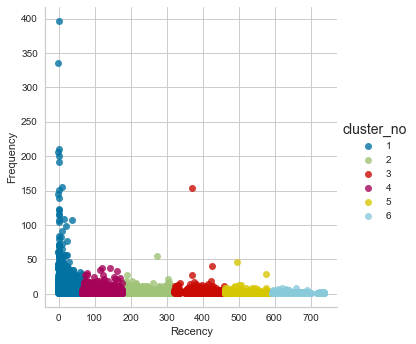

In [273]:
# Recency Vs Frequency Graph :

sns.lmplot(data=rfm, x="Recency", y="Frequency", hue='cluster_no', fit_reg=False, legend=True, legend_out=True);

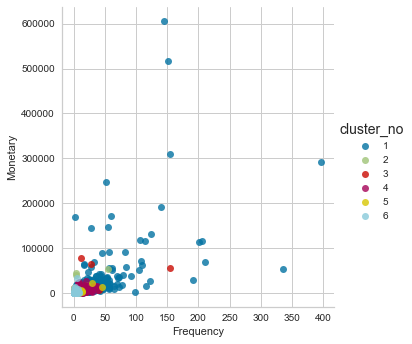

In [274]:
# Frequency Vs Monetary Graph :

sns.lmplot(data=rfm, x="Frequency", y="Monetary", hue='cluster_no', fit_reg=False, legend=True, legend_out=True);

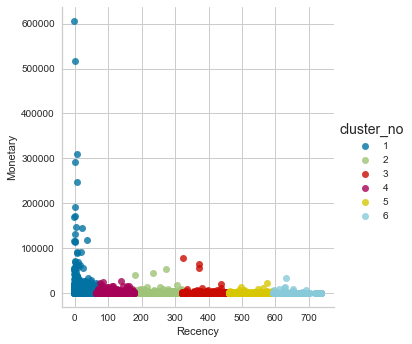

In [275]:
# Recency Vs Monetary Graph :

sns.lmplot(data=rfm, x="Recency", y="Monetary", hue='cluster_no', fit_reg=False, legend=True, legend_out=True);

In [276]:
rfm[["cluster_no", "Monetary"]].groupby(["cluster_no"]).agg(["mean","count","sum"])

Monetary                    
                   mean count           sum
cluster_no                                 
1           5255.322711  2537  1.333275e+07
2           1286.393258   697  8.966161e+05
3           1050.248716   879  9.231686e+05
4           1864.637085   921  1.717331e+06
5            714.027545   448  3.198843e+05
6            578.681663   392  2.268432e+05

In [277]:
rfm[["cluster_no", "Frequency"]].groupby(["cluster_no"]).agg(["mean","max","min","count"])

Frequency               
                 mean  max min count
cluster_no                          
1           10.286165  397   1  2537
2            3.361549   55   1   697
3            2.746303  154   1   879
4            4.850163   38   1   921
5            2.151786   46   1   448
6            1.359694    8   1   392

In [278]:
rfm[["cluster_no", "Recency"]].groupby(["cluster_no"]).agg(["mean","max","min","count"])

Recency                
                  mean  max  min count
cluster_no                            
1            23.959795   69   -1  2537
2           244.309900  319  177   697
3           397.444824  459  321   879
4           109.595005  176   65   921
5           524.140625  592  461   448
6           662.234694  737  594   392

In [279]:
rfm1 = rfm[["cluster_no", "Monetary"]].groupby(["cluster_no"]).agg(["mean"])
rfm2 = rfm[["cluster_no", "Frequency"]].groupby(["cluster_no"]).agg(["mean"])
rfm3 = rfm[["cluster_no", "Recency"]].groupby(["cluster_no"]).agg(["mean"])
rfm4 = rfm.groupby("cluster_no").agg({"cluster_no":"count"})

In [280]:
rfm_summary= pd.concat([rfm4,rfm1,rfm2,rfm3],axis=1)

In [281]:
rfm_summary.rename(columns = {'cluster_no':'Number of Customers'}, inplace = True)

In [282]:
rfm_summary

,Number of Customers,"(Monetary, mean)","(Frequency, mean)","(Recency, mean)"
cluster_no,,,,
1,2537,5255.322711,10.286165,23.959795
2,697,1286.393258,3.361549,244.309900
3,879,1050.248716,2.746303,397.444824
4,921,1864.637085,4.850163,109.595005
5,448,714.027545,2.151786,524.140625
6,392,578.681663,1.359694,662.234694


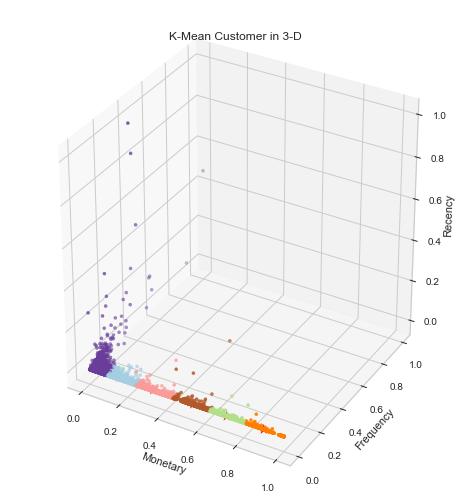

In [254]:
# 3D Graph
from mpl_toolkits.mplot3d import Axes3D

#Getting the cluster centers
C3D = kmeans.cluster_centers_

labels3D = kmeans.predict(df3)
fig = plt.figure(figsize=(18, 9))
d3 = fig.add_subplot(1, 2, 2, projection='3d')
d3.scatter(df3[:, 0], df3[:, 1], df3[:, 2], c=labels3D, s=10, cmap='Paired')
d3.scatter(C3D[:, 0], C3D[:, 1], C3D[:, 2], marker='*', c='red', s=100)
d3.set_xlabel('Monetary')
d3.set_ylabel('Frequency')
d3.set_zlabel('Recency')
d3.set_title('K-Mean Customer in 3-D')

plt.show()

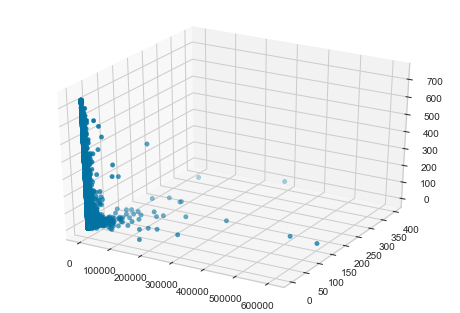

In [195]:
from mpl_toolkits.mplot3d import Axes3D 
import matplotlib.pyplot as plt
colors = ['red', 'blue', 'green','yellow','orange','black']
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d') 
ax.scatter(rfm.Monetary, rfm.Frequency, rfm.Recency,)

plt.show()

In [126]:
######  Classification Algorithm :

In [153]:
# Create Training and Testing Set

from sklearn.model_selection import train_test_split

train , test = train_test_split(rfm, test_size = 0.7)

#separate target values
y = rfm.cluster_no.values

x_train = train.drop('cluster_no', axis=1)
y_train = train['cluster_no']

x_test = test.drop('cluster_no', axis = 1)
y_test = test['cluster_no']

In [128]:
# Preprocessing- scaling the features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)

x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, x_train, y_train, x_test, y_test, train=True):
    if train:
        pred = clf.predict(x_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(x_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [130]:
# KNN Algorithm:

#import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    #Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    #Fit the model
    knn.fit(x_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(x_train, y_train)
    
    #Compute accuracy on the test set
    test_accuracy[i] = knn.score(x_test, y_test) 

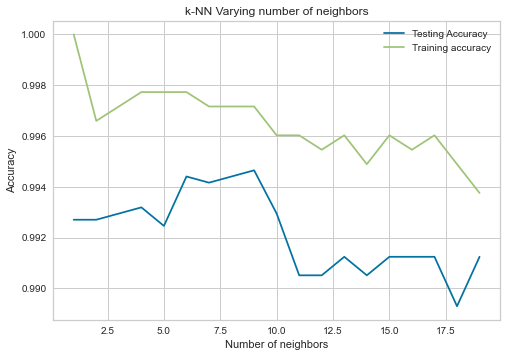

In [131]:
#Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [132]:
#Setup a knn classifier with k=6 neighbors
knn = KNeighborsClassifier(n_neighbors=7)

#Fit the model
knn.fit(x_train, y_train)

print_score(knn, x_train, y_train, x_test, y_test, train=True)
print_score(knn, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 99.72%
_______________________________________________
CLASSIFICATION REPORT:
                    1           2      3           4           5      6  \
precision    1.000000    1.000000    1.0    0.990099    0.990950    1.0   
recall       0.992857    0.997257    1.0    1.000000    0.995455    1.0   
f1-score     0.996416    0.998626    1.0    0.995025    0.993197    1.0   
support    280.000000  729.000000  129.0  300.000000  220.000000  104.0   

           accuracy    macro avg  weighted avg  
precision  0.997162     0.996842      0.997184  
recall     0.997162     0.997595      0.997162  
f1-score   0.997162     0.997211      0.997166  
support    0.997162  1762.000000   1762.000000  
_______________________________________________
Confusion Matrix: 
 [[278   0   0   0   2   0]
 [  0 727   0   2   0   0]
 [  0   0 129   0   0   0]
 [  0   0   0 300   0   0]
 [  0   0   0   1 219   0]
 [  0   0   0   0   0 104]]

Test Result:
Accuracy Score: 99.42%
___

In [133]:
# Make prediction on test set
pred=knn.predict(x_test)

#calculate RMSE
knn_error = sqrt(mean_squared_error(y_test,pred)) 

knn_error

0.20092199930681426

In [171]:
# creating list of K for KNN
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print (scores.mean())

0.7741429121725731


In [ ]:
#check mean score for the top performing value of n_neighbors
knn_gscv.best_score

In [180]:
###### Random Forest ######

from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(x_train, y_train)

print_score(rf_clf, x_train, y_train, x_test, y_test, train=True)
print_score(rf_clf, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               1      2      3      4      5      6  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    262.0  733.0  138.0  301.0  222.0  106.0       1.0     1762.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          1762.0  
_______________________________________________
Confusion Matrix: 
 [[262   0   0   0   0   0]
 [  0 733   0   0   0   0]
 [  0   0 138   0   0   0]
 [  0   0   0 301   0   0]
 [  0   0   0   0 222   0]
 [  0   0   0   0   0 106]]

Test Result:
Accuracy Score: 98.64%
_______________________________________________
CLASSIFICATION REPORT:
                    1       2           3

In [181]:
# Make prediction on test set
rf_pred=rf_clf.predict(x_test)

#calculate RMSE
rf_error = sqrt(mean_squared_error(y_test,rf_pred)) 

rf_error

0.31691914298549634

In [199]:
pip install dtreeviz

     |████████████████████████████████| 60 kB 765 kB/s eta 0:00:01
  Created wheel for dtreeviz: filename=dtreeviz-1.3-py3-none-any.whl size=66638 sha256=e4376946451fe8a236d95d55f0cf97aefb4b57892932ed7203ca3dcb4711586e
  Stored in directory: /Users/ruchimendhegiri/Library/Caches/pip/wheels/9e/37/2c/3b30269ca762b6bb992fd0abb640f3e384c290e719597fddbc
Successfully built dtreeviz
Note: you may need to restart the kernel to use updated packages.


In [200]:
# Random Forest Hyperparameter Tunning

from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

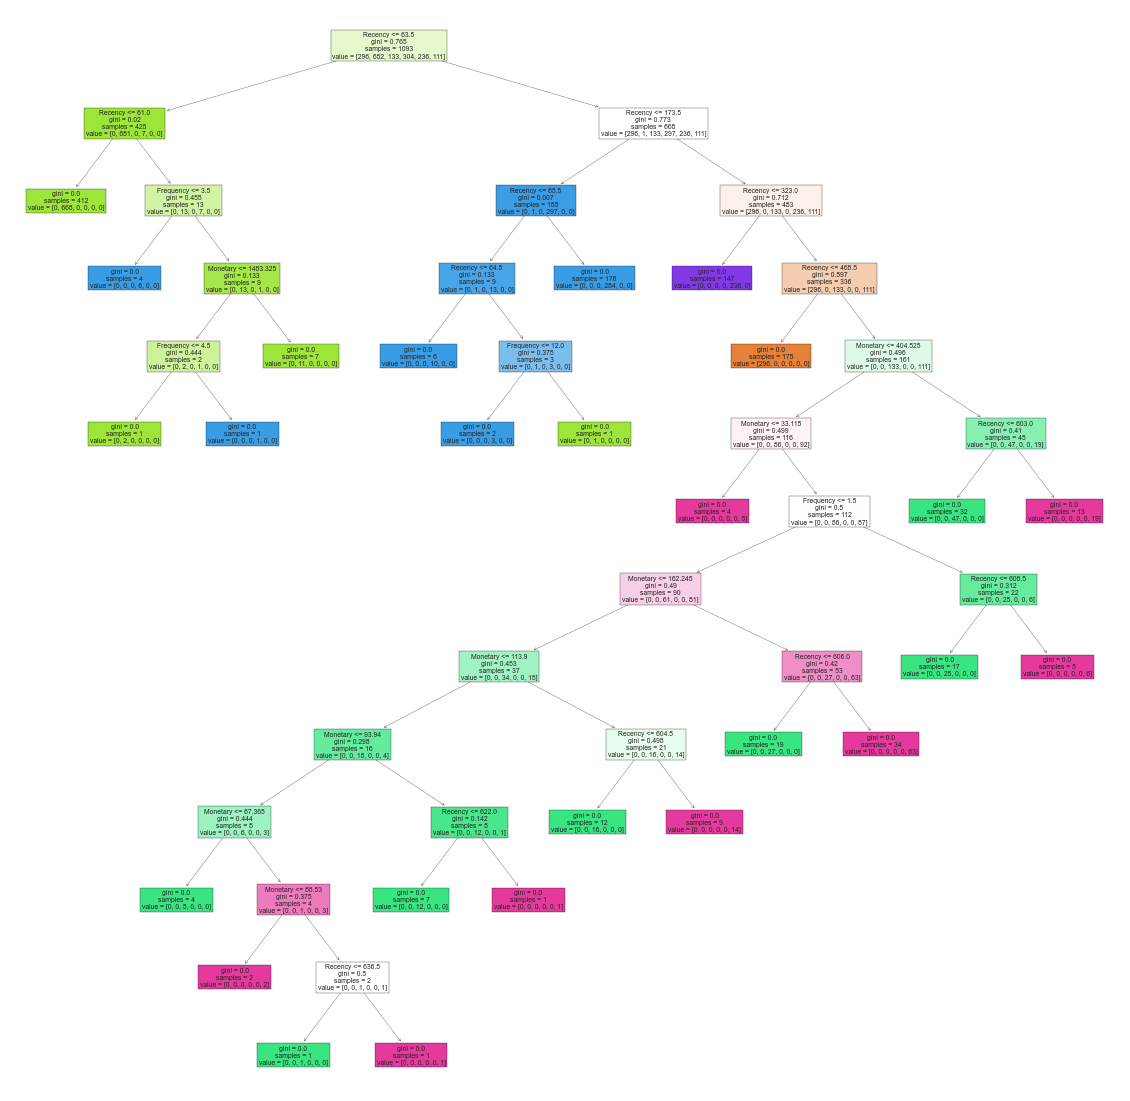

In [203]:
features = list(rfm.columns)
features.remove("cluster_no")
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_clf.estimators_[0], feature_names=features, filled=True)


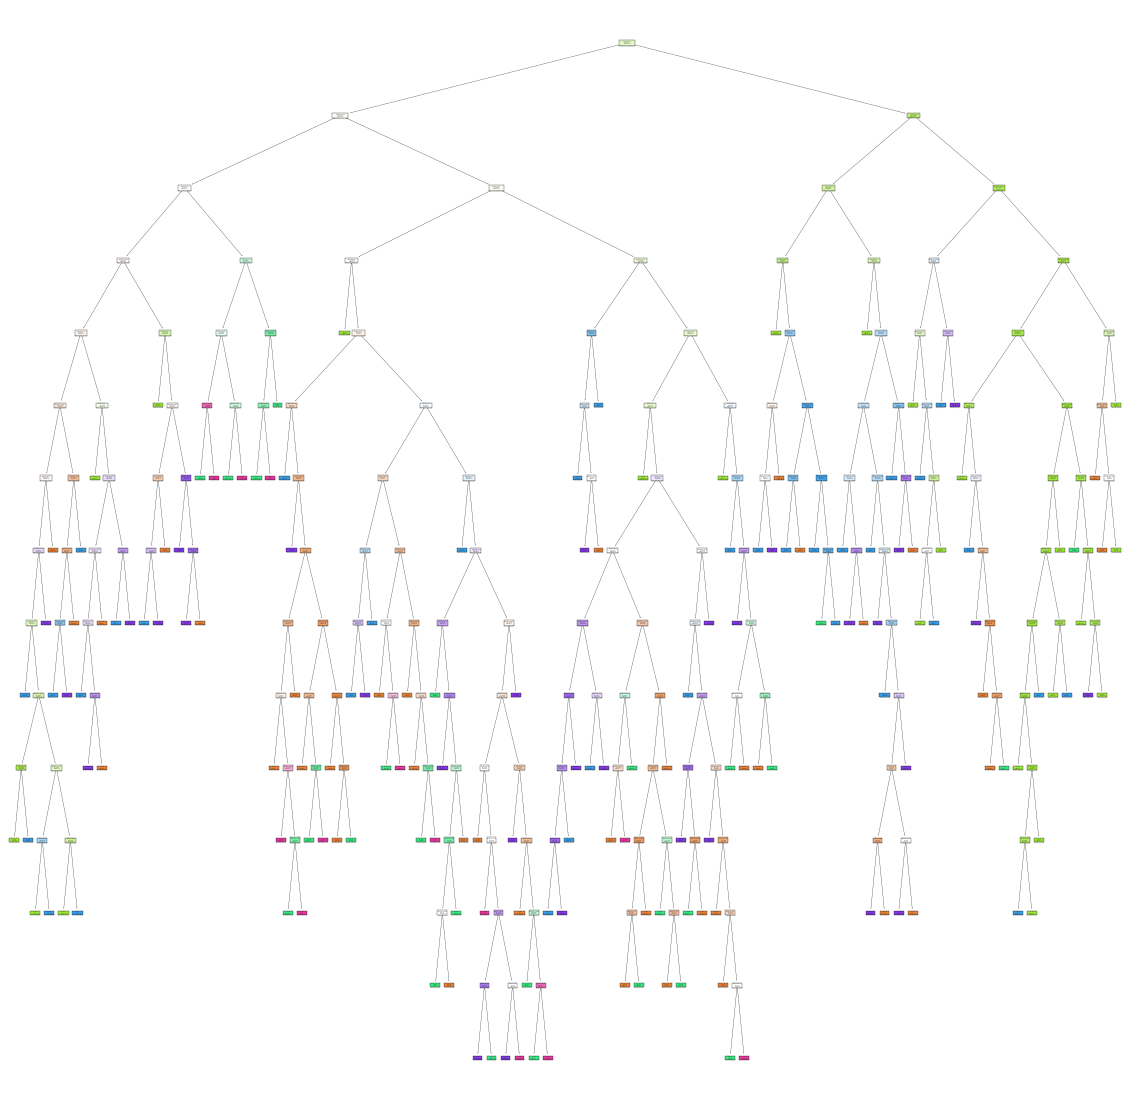

In [286]:
features = list(rfm.columns)
features.remove("cluster_no")
plt.figure(figsize=(20,20))
_ = tree.plot_tree(rf_clf.estimators_[16], feature_names=features, filled=True)

In [183]:
# creating list of K for random Forest
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    rf1 = RandomForestClassifier(n_estimators=100)
    scores = cross_val_score(rf1, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print (scores.mean())

0.9858211350796097


In [ ]:
# Graphical Representation

In [184]:
###### Decision Tree:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,DecisionTreeRegressor

dtc = DecisionTreeClassifier(max_depth=10)
dtc.fit(x_train, y_train)

print_score(dtc, x_train, y_train, x_test, y_test, train=True)
print_score(dtc, x_train, y_train, x_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               1      2      3      4      5      6  accuracy  macro avg  \
precision    1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
recall       1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
f1-score     1.0    1.0    1.0    1.0    1.0    1.0       1.0        1.0   
support    262.0  733.0  138.0  301.0  222.0  106.0       1.0     1762.0   

           weighted avg  
precision           1.0  
recall              1.0  
f1-score            1.0  
support          1762.0  
_______________________________________________
Confusion Matrix: 
 [[262   0   0   0   0   0]
 [  0 733   0   0   0   0]
 [  0   0 138   0   0   0]
 [  0   0   0 301   0   0]
 [  0   0   0   0 222   0]
 [  0   0   0   0   0 106]]

Test Result:
Accuracy Score: 99.68%
_______________________________________________
CLASSIFICATION REPORT:
                    1            2       

In [185]:
# Make prediction on test set
dtc_pred=dtc.predict(x_test)

#calculate RMSE
dtc_error = sqrt(mean_squared_error(y_test,dtc_pred)) 

dtc_error

0.14207330819940717

In [178]:
# creating list of K for Decision Tree
k_list = list(range(1,50,2))
# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    dt = DecisionTreeClassifier(max_depth=10)
    scores = cross_val_score(dt, x_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())
print (scores.mean())

0.9965941191576786


In [139]:
#Decision Tree Classifier Hyperparameter tuning

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

params = {
    "criterion":("gini", "entropy"), 
    "splitter":("best", "random"), 
    "max_depth":(list(range(1, 20))), 
    "min_samples_split":[2, 3, 4], 
    "min_samples_leaf":list(range(1, 20)), 
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'})
Train Result:
Accuracy Score: 99.94%
_______________________________________________
CLASSIFICATION REPORT:
               1           2      3           4      5      6  accuracy  \
precision    1.0    1.000000    1.0    0.996678    1.0    1.0  0.999432   
recall       1.0    0.998628    1.0    1.000000    1.0    1.0  0.999432   
f1-score     1.0    0.999314    1.0    0.998336    1.0    1.0  0.999432   
support    280.0  729.000000  129.0  300.000000  220.0  104.0  0.999432   

             macro avg  weighted avg  
precision     0.999446      0.999434  
recall        0.999771      0.999432  
f1-score      0.999608      0.999433  
support    1762.000000   1762.000000  
_______________________________________________
Confusion Matrix: 
 [[280   0   0   0   0   0]
 [  0 728   0   1   0   0]
 [  0   0 1

In [140]:
#brew install graphviz

In [141]:
#pip install graphviz

In [142]:
#pip install pydotplus

In [143]:
#pip install six

In [144]:
# Graphical Representation:

from IPython.display import Image
from six import StringIO
from sklearn import tree
from sklearn.tree import export_graphviz

features = list(rfm.columns)
features.remove("cluster_no")

In [145]:
text_representation = tree.export_text(tree_clf)
print(text_representation)

|--- feature_0 <= 0.08
|   |--- class: 2
|--- feature_0 >  0.08
|   |--- feature_0 <= 0.24
|   |   |--- feature_0 <= 0.09
|   |   |   |--- feature_2 <= 0.01
|   |   |   |   |--- feature_1 <= 0.00
|   |   |   |   |   |--- class: 4
|   |   |   |   |--- feature_1 >  0.00
|   |   |   |   |   |--- class: 4
|   |   |   |--- feature_2 >  0.01
|   |   |   |   |--- class: 2
|   |   |--- feature_0 >  0.09
|   |   |   |--- class: 4
|   |--- feature_0 >  0.24
|   |   |--- feature_0 <= 0.44
|   |   |   |--- class: 5
|   |   |--- feature_0 >  0.44
|   |   |   |--- feature_0 <= 0.63
|   |   |   |   |--- class: 1
|   |   |   |--- feature_0 >  0.63
|   |   |   |   |--- feature_0 <= 0.82
|   |   |   |   |   |--- class: 3
|   |   |   |   |--- feature_0 >  0.82
|   |   |   |   |   |--- class: 6



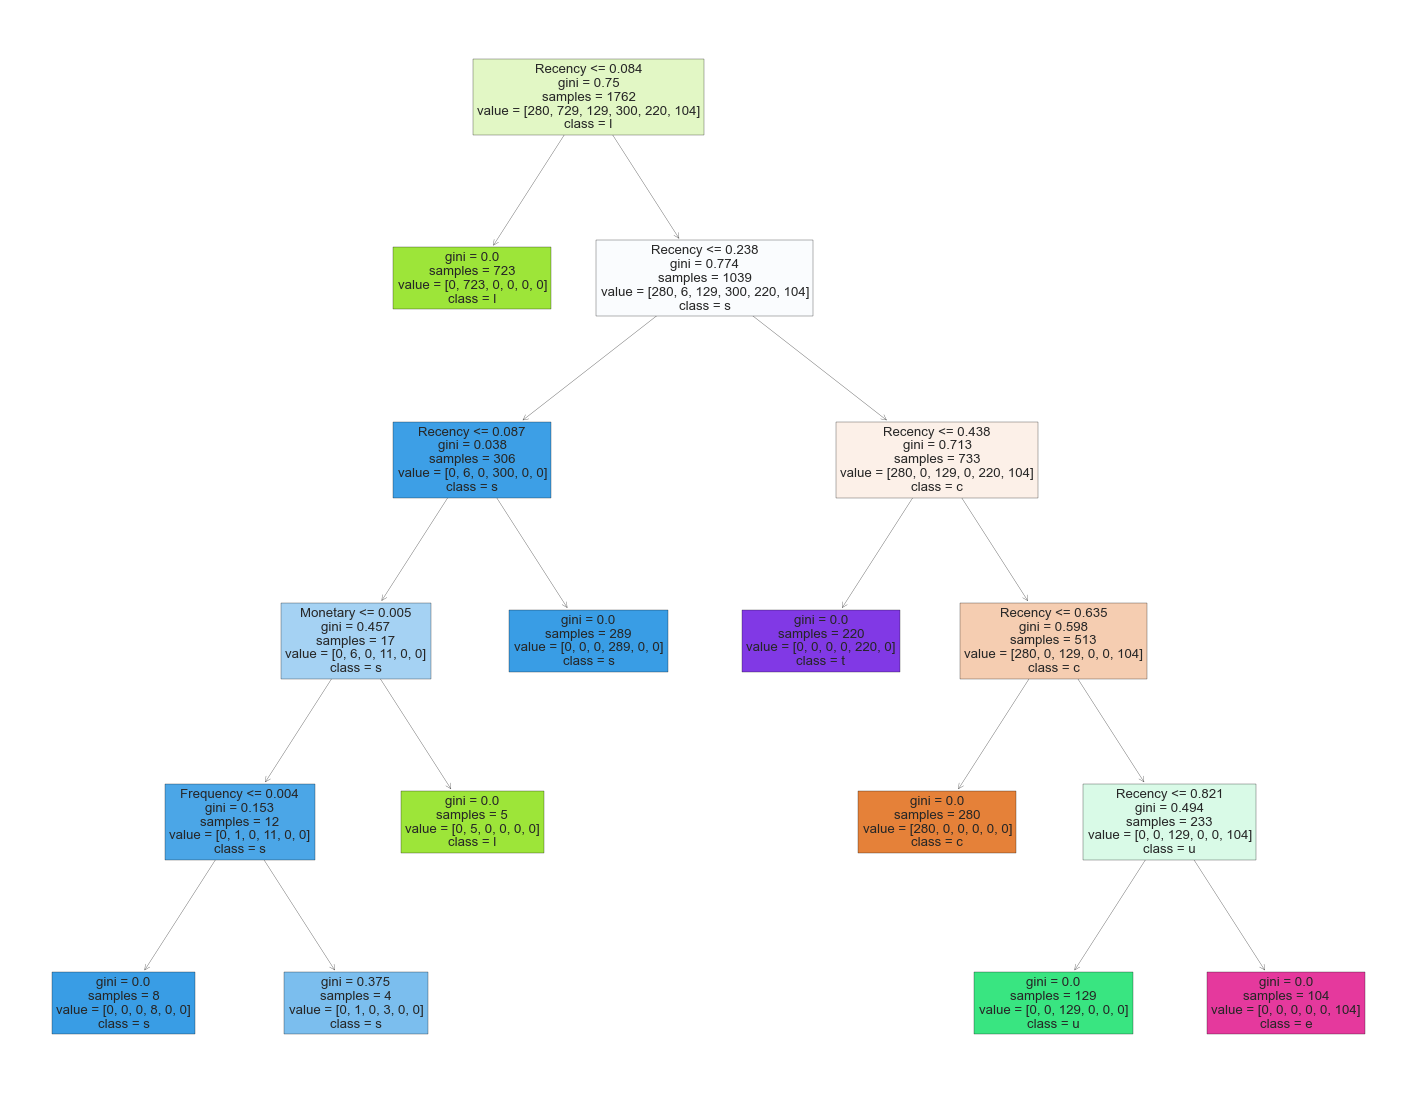

In [146]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(tree_clf, 
                   feature_names=features,  
                   class_names="cluster_no",
                   filled=True)

In [147]:
rfm

,Recency,Frequency,Monetary,cluster_no
Customer ID,,,,
12346,324,12,77556.46,1
12347,1,8,5458.52,2
12348,74,5,1979.40,4
12349,17,4,4380.81,2
12350,309,1,291.80,5
...,...,...,...,...
18283,2,22,2687.34,2
18284,430,1,461.68,1
18285,659,1,427.00,6


In [205]:
# DF TO EXCEL
from pandas import ExcelWriter

writer = ExcelWriter('PythonExport.xlsx')
rfm.to_excel(writer,'Sheet5')
writer.save()



In [207]:
rfm_summary

,Number of Customers,"(Monetary, mean)","(Frequency, mean)","(Recency, mean)"
cluster_no,,,,
1,908,1038.747358,2.737885,400.961454
2,2452,5380.648254,10.493883,22.577080
3,444,706.084212,2.063063,534.943694
4,987,1861.448455,4.831814,104.389058
5,725,1273.588126,3.364138,243.462069
6,358,575.313469,1.329609,668.388268
